In [2]:
!pip install kaggle

In [3]:
import pandas as pd
import numpy as np
import zipfile
import kaggle

In [4]:
!kaggle datasets download -d londeen/world-happiness-report-2020

world-happiness-report-2020.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
file_path = "/Users/linyixi/Desktop/WHR20_DataForFigure2.1.csv"
world_happiness = pd.read_csv(file_path)
world_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [6]:
world_happiness.shape

(153, 20)

In [7]:
world_happiness

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [8]:
world_happiness.rename(columns={'Country name':'Country Name'}, inplace=True)
#change to same column name for join

In [9]:
world_happiness

,Country Name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [10]:
file_path = "/Users/linyixi/Desktop/API_EN/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_542.csv"
co2 = pd.read_csv(file_path)
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    240 non-null    object 
 1   Country Code    240 non-null    object 
 2   Indicator Name  240 non-null    object 
 3   Indicator Code  240 non-null    object 
 4   1990            238 non-null    float64
 5   1991            239 non-null    float64
 6   1992            239 non-null    float64
 7   1993            239 non-null    float64
 8   1994            239 non-null    float64
 9   1995            239 non-null    float64
 10  1996            239 non-null    float64
 11  1997            239 non-null    float64
 12  1998            239 non-null    float64
 13  1999            239 non-null    float64
 14  2000            239 non-null    float64
 15  2001            239 non-null    float64
 16  2002            239 non-null    float64
 17  2003            239 non-null    flo

In [11]:
co2.shape

(240, 37)

In [12]:
co2

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,304614.7202,300135.9431,296834.6917,305267.7791,314596.2871,329784.5578,...,568547.519,591680.972,576265.992,580219.242,590905.482,598720.9575,610723.50,544952.503,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,2046.8700,1941.3700,1525.4700,1527.8900,1493.5900,1457.6900,...,9402.050,9281.340,10057.590,9294.930,10022.780,10972.3800,11238.83,8709.470,NaN,NaN
2,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,97190.3450,110559.9338,121628.0030,114995.8690,106198.4910,116198.6140,...,186486.660,196343.630,194363.640,201399.220,200550.900,210618.8900,222990.35,215915.610,NaN,NaN
3,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,6564.2000,6674.5000,6877.3000,9269.7000,11298.2300,12719.4800,...,26958.700,29610.500,31648.900,29520.700,25064.800,23637.4000,24382.90,19814.500,NaN,NaN
4,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,6060.5000,4119.6000,2239.3000,2078.4000,2084.7000,1951.1000,...,4795.400,5188.000,4797.000,4573.200,5403.700,5316.1000,4993.30,4383.200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Samoa,WSM,CO2 emissions (kt),EN.ATM.CO2E.KT,89.0000,97.7000,102.9000,112.5000,103.4000,116.6000,...,196.700,207.300,232.300,246.700,255.200,248.7000,278.70,206.500,NaN,NaN
236,"Yemen, Rep.",YEM,CO2 emissions (kt),EN.ATM.CO2E.KT,6642.3000,8498.5000,9130.0000,8552.3000,9339.6000,10531.7000,...,27825.000,27429.900,13552.200,10035.200,9682.200,11349.8000,11194.80,9960.100,NaN,NaN
237,South Africa,ZAF,CO2 emissions (kt),EN.ATM.CO2E.KT,247614.7000,242286.0000,238780.6000,246445.9000,252088.5000,264251.5000,...,437261.700,448298.100,425063.100,425682.900,435214.500,439644.6000,446626.00,393241.600,NaN,NaN
238,Zambia,ZMB,CO2 emissions (kt),EN.ATM.CO2E.KT,2740.8000,2876.2000,2848.0000,2514.4000,2143.8000,2129.5000,...,4238.600,4686.000,4956.600,5315.300,6810.700,7857.2000,7615.70,7607.100,NaN,NaN


In [13]:
co2.rename(columns={'2020':'CO2 emissions'}, inplace=True)
co2

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2013,2014,2015,2016,2017,2018,2019,CO2 emissions,2021,2022
0,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,304614.7202,300135.9431,296834.6917,305267.7791,314596.2871,329784.5578,...,568547.519,591680.972,576265.992,580219.242,590905.482,598720.9575,610723.50,544952.503,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,2046.8700,1941.3700,1525.4700,1527.8900,1493.5900,1457.6900,...,9402.050,9281.340,10057.590,9294.930,10022.780,10972.3800,11238.83,8709.470,NaN,NaN
2,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,97190.3450,110559.9338,121628.0030,114995.8690,106198.4910,116198.6140,...,186486.660,196343.630,194363.640,201399.220,200550.900,210618.8900,222990.35,215915.610,NaN,NaN
3,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,6564.2000,6674.5000,6877.3000,9269.7000,11298.2300,12719.4800,...,26958.700,29610.500,31648.900,29520.700,25064.800,23637.4000,24382.90,19814.500,NaN,NaN
4,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,6060.5000,4119.6000,2239.3000,2078.4000,2084.7000,1951.1000,...,4795.400,5188.000,4797.000,4573.200,5403.700,5316.1000,4993.30,4383.200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Samoa,WSM,CO2 emissions (kt),EN.ATM.CO2E.KT,89.0000,97.7000,102.9000,112.5000,103.4000,116.6000,...,196.700,207.300,232.300,246.700,255.200,248.7000,278.70,206.500,NaN,NaN
236,"Yemen, Rep.",YEM,CO2 emissions (kt),EN.ATM.CO2E.KT,6642.3000,8498.5000,9130.0000,8552.3000,9339.6000,10531.7000,...,27825.000,27429.900,13552.200,10035.200,9682.200,11349.8000,11194.80,9960.100,NaN,NaN
237,South Africa,ZAF,CO2 emissions (kt),EN.ATM.CO2E.KT,247614.7000,242286.0000,238780.6000,246445.9000,252088.5000,264251.5000,...,437261.700,448298.100,425063.100,425682.900,435214.500,439644.6000,446626.00,393241.600,NaN,NaN
238,Zambia,ZMB,CO2 emissions (kt),EN.ATM.CO2E.KT,2740.8000,2876.2000,2848.0000,2514.4000,2143.8000,2129.5000,...,4238.600,4686.000,4956.600,5315.300,6810.700,7857.2000,7615.70,7607.100,NaN,NaN


In [14]:
co2.drop(columns=co2.loc[:,'1990':'2019'], inplace=True)
co2.drop(columns=co2.loc[:,'2021':'2022'], inplace=True)
co2

,Country Name,Country Code,Indicator Name,Indicator Code,CO2 emissions
0,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,544952.503
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,8709.470
2,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,215915.610
3,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,19814.500
4,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,4383.200
...,...,...,...,...,...
235,Samoa,WSM,CO2 emissions (kt),EN.ATM.CO2E.KT,206.500
236,"Yemen, Rep.",YEM,CO2 emissions (kt),EN.ATM.CO2E.KT,9960.100
237,South Africa,ZAF,CO2 emissions (kt),EN.ATM.CO2E.KT,393241.600
238,Zambia,ZMB,CO2 emissions (kt),EN.ATM.CO2E.KT,7607.100


In [15]:
merged1_df = pd.merge(world_happiness, co2, on='Country Name', how='inner')
#INNER JOIN  returns only rows with a match in both tables.

In [16]:
merged1_df

,Country Name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Country Code,Indicator Name,Indicator Code,CO2 emissions
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,FIN,CO2 emissions (kt),EN.ATM.CO2E.KT,36329.90
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,DNK,CO2 emissions (kt),EN.ATM.CO2E.KT,27356.50
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,CHE,CO2 emissions (kt),EN.ATM.CO2E.KT,34916.10
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,ISL,CO2 emissions (kt),EN.ATM.CO2E.KT,1446.60
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,NOR,CO2 emissions (kt),EN.ATM.CO2E.KT,36177.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,CAF,CO2 emissions (kt),EN.ATM.CO2E.KT,236.60
126,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,RWA,CO2 emissions (kt),EN.ATM.CO2E.KT,1382.00
127,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,ZWE,CO2 emissions (kt),EN.ATM.CO2E.KT,8312.50
128,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,...,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,SSD,CO2 emissions (kt),EN.ATM.CO2E.KT,1742.70


In [17]:
merged1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country Name                                130 non-null    object 
 1   Regional indicator                          130 non-null    object 
 2   Ladder score                                130 non-null    float64
 3   Standard error of ladder score              130 non-null    float64
 4   upperwhisker                                130 non-null    float64
 5   lowerwhisker                                130 non-null    float64
 6   Logged GDP per capita                       130 non-null    float64
 7   Social support                              130 non-null    float64
 8   Healthy life expectancy                     130 non-null    float64
 9   Freedom to make life choices                130 non-null    float64
 10  Generosity    

In [18]:
!kaggle datasets download -d mammadabbasli/drinkshabit

drinkshabit.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
file_path = "/Users/linyixi/Desktop/drinks.csv"
drinks = pd.read_csv(file_path)
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 193 non-null    int64  
 3   spirit_servings               193 non-null    int64  
 4   wine_servings                 193 non-null    int64  
 5   total_litres_of_pure_alcohol  193 non-null    float64
 6   religion                      193 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 10.7+ KB


In [20]:
drinks

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion
0,0,Afghanistan,0,0,0,0.0,muslim mostly
1,1,Albania,89,132,54,4.9,muslim mostly
2,2,Algeria,25,0,14,0.7,christian mostly
3,3,Andorra,245,138,312,12.4,christian mostly
4,4,Angola,217,57,45,5.9,christian mostly
...,...,...,...,...,...,...,...
188,188,Venezuela,333,100,3,7.7,christian mostly
189,189,Vietnam,111,2,1,2.0,other
190,190,Yemen,6,0,0,0.1,muslim mostly
191,191,Zambia,32,19,4,2.5,christian mostly


In [21]:
drinks.rename(columns={'country':'Country Name'}, inplace=True)
drinks

,Unnamed: 0,Country Name,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion
0,0,Afghanistan,0,0,0,0.0,muslim mostly
1,1,Albania,89,132,54,4.9,muslim mostly
2,2,Algeria,25,0,14,0.7,christian mostly
3,3,Andorra,245,138,312,12.4,christian mostly
4,4,Angola,217,57,45,5.9,christian mostly
...,...,...,...,...,...,...,...
188,188,Venezuela,333,100,3,7.7,christian mostly
189,189,Vietnam,111,2,1,2.0,other
190,190,Yemen,6,0,0,0.1,muslim mostly
191,191,Zambia,32,19,4,2.5,christian mostly


In [22]:
merged2_df = pd.merge(merged1_df, drinks, on='Country Name', how='inner')
merged2_df

,Country Name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Country Code,Indicator Name,Indicator Code,CO2 emissions,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,FIN,CO2 emissions (kt),EN.ATM.CO2E.KT,36329.90,60,263,133,97,10.0,christian mostly
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,DNK,CO2 emissions (kt),EN.ATM.CO2E.KT,27356.50,48,224,81,278,10.4,christian mostly
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,CHE,CO2 emissions (kt),EN.ATM.CO2E.KT,34916.10,166,185,100,280,10.2,christian mostly
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,ISL,CO2 emissions (kt),EN.ATM.CO2E.KT,1446.60,76,233,61,78,6.6,christian mostly
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,NOR,CO2 emissions (kt),EN.ATM.CO2E.KT,36177.40,126,169,71,129,6.7,christian mostly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Tanzania,Sub-Saharan Africa,3.4762,0.063210,3.600091,3.352309,7.967665,0.688933,57.496075,0.821540,...,TZA,CO2 emissions (kt),EN.ATM.CO2E.KT,14435.50,183,36,6,1,5.7,christian mostly
122,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,CAF,CO2 emissions (kt),EN.ATM.CO2E.KT,236.60,33,17,2,1,1.8,christian mostly
123,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,RWA,CO2 emissions (kt),EN.ATM.CO2E.KT,1382.00,142,43,2,0,6.8,christian mostly
124,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,ZWE,CO2 emissions (kt),EN.ATM.CO2E.KT,8312.50,192,64,18,4,4.7,christian mostly


In [23]:
!kaggle datasets download -d zedataweaver/global-salary-data

global-salary-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
file_path = "/Users/linyixi/Desktop/salary_data.csv"
salary = pd.read_csv(file_path)
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    221 non-null    object 
 1   continent_name  221 non-null    object 
 2   wage_span       221 non-null    object 
 3   median_salary   221 non-null    float64
 4   average_salary  221 non-null    float64
 5   lowest_salary   221 non-null    float64
 6   highest_salary  221 non-null    float64
dtypes: float64(4), object(3)
memory usage: 12.2+ KB


In [25]:
salary

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,Afghanistan,Asia,Monthly,853.740000,1001.150000,252.530000,4460.970000
1,Aland Islands,Europe,Monthly,3319.240000,3858.350000,972.520000,17124.740000
2,Albania,Europe,Monthly,832.840000,956.920000,241.220000,4258.490000
3,Algeria,Africa,Monthly,1148.840000,1308.810000,330.110000,5824.180000
4,American Samoa,Oceania,Monthly,1390.000000,1570.000000,400.000000,6980.000000
...,...,...,...,...,...,...,...
216,Virgin Islands (US),North America,Monthly,2380.000000,2710.000000,680.000000,12000.000000
217,Western Sahara,Africa,Monthly,908.560000,1011.670000,254.860000,4503.890000
218,Yemen,Asia,Monthly,120.980000,133.360000,33.620000,594.930000
219,Zambia,Africa,Monthly,0.261335,0.285524,0.072092,1.271103


In [26]:
salary=salary.loc[:, ['country_name', 'median_salary']]
salary

,country_name,median_salary
0,Afghanistan,853.740000
1,Aland Islands,3319.240000
2,Albania,832.840000
3,Algeria,1148.840000
4,American Samoa,1390.000000
...,...,...
216,Virgin Islands (US),2380.000000
217,Western Sahara,908.560000
218,Yemen,120.980000
219,Zambia,0.261335


In [27]:
salary.rename(columns={'country_name':'Country Name'}, inplace=True)
salary

,Country Name,median_salary
0,Afghanistan,853.740000
1,Aland Islands,3319.240000
2,Albania,832.840000
3,Algeria,1148.840000
4,American Samoa,1390.000000
...,...,...
216,Virgin Islands (US),2380.000000
217,Western Sahara,908.560000
218,Yemen,120.980000
219,Zambia,0.261335


In [28]:
merged3_df = pd.merge(merged2_df, salary, on='Country Name', how='inner')
merged3_df

,Country Name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Indicator Name,Indicator Code,CO2 emissions,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion,median_salary
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,CO2 emissions (kt),EN.ATM.CO2E.KT,36329.90,60,263,133,97,10.0,christian mostly,4238.90000
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,CO2 emissions (kt),EN.ATM.CO2E.KT,27356.50,48,224,81,278,10.4,christian mostly,5084.99000
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,CO2 emissions (kt),EN.ATM.CO2E.KT,34916.10,166,185,100,280,10.2,christian mostly,9836.07000
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,CO2 emissions (kt),EN.ATM.CO2E.KT,1446.60,76,233,61,78,6.6,christian mostly,4661.20000
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,CO2 emissions (kt),EN.ATM.CO2E.KT,36177.40,126,169,71,129,6.7,christian mostly,4420.02000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Tanzania,Sub-Saharan Africa,3.4762,0.063210,3.600091,3.352309,7.967665,0.688933,57.496075,0.821540,...,CO2 emissions (kt),EN.ATM.CO2E.KT,14435.50,183,36,6,1,5.7,christian mostly,457.77000
120,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,CO2 emissions (kt),EN.ATM.CO2E.KT,236.60,33,17,2,1,1.8,christian mostly,621.99000
121,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,CO2 emissions (kt),EN.ATM.CO2E.KT,1382.00,142,43,2,0,6.8,christian mostly,525.39000
122,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,CO2 emissions (kt),EN.ATM.CO2E.KT,8312.50,192,64,18,4,4.7,christian mostly,555.40204


In [29]:
!kaggle kernels pull joshuaswords/awesome-eda-2021-happiness-population

Source code downloaded to /Users/linyixi/awesome-eda-2021-happiness-population.ipynb


In [30]:
file_path = "/Users/linyixi/Desktop/population_by_country_2020.csv.xls"
population = pd.read_csv(file_path)
population

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [31]:
population.rename(columns={'Country (or dependency)':'Country Name'}, inplace=True)
population

,Country Name,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [32]:
merged4_df = pd.merge(merged3_df, population, on='Country Name', how='inner')
merged4_df

,Country Name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,5542237,0.15 %,8564,18,303890,14000.0,1.5,43,86 %,0.07 %
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,5795780,0.35 %,20326,137,42430,15200.0,1.8,42,88 %,0.07 %
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,8665615,0.74 %,63257,219,39516,52000.0,1.5,43,74 %,0.11 %
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,341628,0.65 %,2212,3,100250,380.0,1.8,37,94 %,0.00 %
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,5428594,0.79 %,42384,15,365268,28000.0,1.7,40,83 %,0.07 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Tanzania,Sub-Saharan Africa,3.4762,0.063210,3.600091,3.352309,7.967665,0.688933,57.496075,0.821540,...,60012400,2.98 %,1728755,67,885800,-40076.0,4.9,18,37 %,0.77 %
120,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,4843954,1.78 %,84582,8,622980,-40000.0,4.8,18,43 %,0.06 %
121,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,13005303,2.58 %,325268,525,24670,-9000.0,4.1,20,18 %,0.17 %
122,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,14899771,1.48 %,217456,38,386850,-116858.0,3.6,19,38 %,0.19 %


In [33]:
!kaggle datasets download -d sazidthe1/sustainable-development-report

sustainable-development-report.zip: Skipping, found more recently modified local copy (use --force to force download)


In [34]:
file_path = "/Users/linyixi/Desktop/sdg_index_2000-2022.csv"
sustainable = pd.read_csv(file_path)
sustainable

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,AFG,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,AFG,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,AFG,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,...,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,AFG,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,...,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,AFG,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,...,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,ZWE,Zimbabwe,2018,55.9,26.4,46.6,39.8,57.9,76.7,51.6,...,63.8,23.5,32.4,79.2,94.6,94.1,0.0,76.4,45.5,45.6
4136,ZWE,Zimbabwe,2019,53.7,21.4,46.0,40.6,60.6,77.0,51.3,...,62.8,23.8,24.0,58.6,94.6,94.2,0.0,76.4,44.0,44.5
4137,ZWE,Zimbabwe,2020,54.3,20.1,47.2,41.5,62.0,77.0,51.1,...,62.9,25.4,24.0,60.0,94.6,94.3,0.0,76.4,44.6,46.0
4138,ZWE,Zimbabwe,2021,54.8,20.8,48.4,41.9,62.5,77.1,51.1,...,63.1,27.0,24.0,61.2,94.5,94.3,0.0,77.9,43.1,48.1


In [35]:
#only want year 2020
sustainable_2020 = sustainable[sustainable['year'] == 2020]
sustainable_2020

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
20,AFG,Afghanistan,2020,47.3,27.9,46.0,37.6,42.0,30.2,50.4,...,41.1,9.8,0.0,30.2,96.7,99.0,0.0,73.2,45.3,44.1
43,ALB,Albania,2020,73.7,98.4,59.0,82.7,94.3,57.3,73.7,...,65.1,41.3,88.1,76.6,81.7,90.5,50.3,79.9,63.5,65.9
66,DZA,Algeria,2020,71.3,97.1,57.6,77.0,77.0,49.8,58.0,...,66.8,49.9,97.0,67.1,89.2,88.7,64.8,62.0,66.2,77.8
89,AGO,Angola,2020,50.8,31.1,55.1,35.1,42.2,49.8,54.3,...,58.7,13.5,16.5,43.2,94.1,96.3,67.5,66.2,44.0,51.9
112,ARG,Argentina,2020,72.7,95.9,68.9,80.0,97.9,80.0,77.9,...,73.0,52.8,41.1,80.9,78.1,89.4,61.5,59.1,62.5,64.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,VNM,Vietnam,2020,71.8,95.4,73.1,69.6,97.8,71.7,74.3,...,75.7,52.4,70.4,83.1,89.1,92.1,47.6,41.6,60.4,57.9
4068,_World,World,2020,66.2,77.1,64.9,70.5,80.1,62.1,62.5,...,72.4,62.8,38.9,66.9,85.0,86.7,62.0,57.4,57.9,56.4
4091,YEM,"Yemen, Rep.",2020,46.8,5.7,28.5,45.2,41.8,13.1,36.2,...,53.0,14.1,66.3,48.9,96.0,98.7,75.0,48.9,36.0,51.1
4114,ZMB,Zambia,2020,53.6,9.4,59.1,45.9,66.7,66.2,52.9,...,65.3,19.8,8.3,56.9,94.9,98.0,0.0,68.9,44.4,55.2


In [36]:
sustainable_2020.rename(columns={'country':'Country Name'}, inplace=True)
sustainable_2020

/var/folders/t2/2w03yjvx1kj87wnsk50c5vz00000gn/T/ipykernel_37547/1332570729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sustainable_2020.rename(columns={'country':'Country Name'}, inplace=True)


,country_code,Country Name,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
20,AFG,Afghanistan,2020,47.3,27.9,46.0,37.6,42.0,30.2,50.4,...,41.1,9.8,0.0,30.2,96.7,99.0,0.0,73.2,45.3,44.1
43,ALB,Albania,2020,73.7,98.4,59.0,82.7,94.3,57.3,73.7,...,65.1,41.3,88.1,76.6,81.7,90.5,50.3,79.9,63.5,65.9
66,DZA,Algeria,2020,71.3,97.1,57.6,77.0,77.0,49.8,58.0,...,66.8,49.9,97.0,67.1,89.2,88.7,64.8,62.0,66.2,77.8
89,AGO,Angola,2020,50.8,31.1,55.1,35.1,42.2,49.8,54.3,...,58.7,13.5,16.5,43.2,94.1,96.3,67.5,66.2,44.0,51.9
112,ARG,Argentina,2020,72.7,95.9,68.9,80.0,97.9,80.0,77.9,...,73.0,52.8,41.1,80.9,78.1,89.4,61.5,59.1,62.5,64.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,VNM,Vietnam,2020,71.8,95.4,73.1,69.6,97.8,71.7,74.3,...,75.7,52.4,70.4,83.1,89.1,92.1,47.6,41.6,60.4,57.9
4068,_World,World,2020,66.2,77.1,64.9,70.5,80.1,62.1,62.5,...,72.4,62.8,38.9,66.9,85.0,86.7,62.0,57.4,57.9,56.4
4091,YEM,"Yemen, Rep.",2020,46.8,5.7,28.5,45.2,41.8,13.1,36.2,...,53.0,14.1,66.3,48.9,96.0,98.7,75.0,48.9,36.0,51.1
4114,ZMB,Zambia,2020,53.6,9.4,59.1,45.9,66.7,66.2,52.9,...,65.3,19.8,8.3,56.9,94.9,98.0,0.0,68.9,44.4,55.2


In [37]:
sustainablescore_2020 = sustainable_2020[['Country Name', 'sdg_index_score']]
sustainablescore_2020

,Country Name,sdg_index_score
20,Afghanistan,47.3
43,Albania,73.7
66,Algeria,71.3
89,Angola,50.8
112,Argentina,72.7
...,...,...
4045,Vietnam,71.8
4068,World,66.2
4091,"Yemen, Rep.",46.8
4114,Zambia,53.6


In [38]:
merged5_df = pd.merge(merged4_df, sustainablescore_2020, on='Country Name', how='inner')
merged5_df

,Country Name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,sdg_index_score
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,0.15 %,8564,18,303890,14000.0,1.5,43,86 %,0.07 %,86.4
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,0.35 %,20326,137,42430,15200.0,1.8,42,88 %,0.07 %,85.1
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,0.74 %,63257,219,39516,52000.0,1.5,43,74 %,0.11 %,80.9
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,0.65 %,2212,3,100250,380.0,1.8,37,94 %,0.00 %,78.1
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,0.79 %,42384,15,365268,28000.0,1.7,40,83 %,0.07 %,82.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Tanzania,Sub-Saharan Africa,3.4762,0.063210,3.600091,3.352309,7.967665,0.688933,57.496075,0.821540,...,2.98 %,1728755,67,885800,-40076.0,4.9,18,37 %,0.77 %,56.9
119,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,1.78 %,84582,8,622980,-40000.0,4.8,18,43 %,0.06 %,38.6
120,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,2.58 %,325268,525,24670,-9000.0,4.1,20,18 %,0.17 %,58.9
121,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,1.48 %,217456,38,386850,-116858.0,3.6,19,38 %,0.19 %,54.3


In [39]:
# Display the list of column names
column_names = merged5_df.columns.tolist()
print(column_names)

['Country Name', 'Regional indicator', 'Ladder score', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual', 'Country Code', 'Indicator Name', 'Indicator Code', 'CO2 emissions', 'Unnamed: 0', 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'religion', 'median_salary', 'Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share', 'sdg_index_score']


In [40]:
new_column_names = {
    'Regional indicator': 'region',
    'sdg_index_score': 'Sustainable development score', 
}
# Rename the columns
merged5_df.rename(columns=new_column_names, inplace=True)
column_names = merged5_df.columns.tolist()
print(column_names)

['Country Name', 'region', 'Ladder score', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual', 'Country Code', 'Indicator Name', 'Indicator Code', 'CO2 emissions', 'Unnamed: 0', 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'religion', 'median_salary', 'Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share', 'Sustainable development score']


In [41]:
# Drop the specified columns
columns_to_drop = ['Standard error of ladder score','upperwhisker','lowerwhisker','Country Code','Indicator Name','Indicator Code','Unnamed: 0','Yearly Change', 'Net Change']
merged5_df.drop(columns=columns_to_drop, inplace=True)

In [42]:
merged5_df

,Country Name,region,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,...,median_salary,Population (2020),Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Sustainable development score
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,...,4238.90000,5542237,18,303890,14000.0,1.5,43,86 %,0.07 %,86.4
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,...,5084.99000,5795780,137,42430,15200.0,1.8,42,88 %,0.07 %,85.1
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,...,9836.07000,8665615,219,39516,52000.0,1.5,43,74 %,0.11 %,80.9
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,...,4661.20000,341628,3,100250,380.0,1.8,37,94 %,0.00 %,78.1
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,...,4420.02000,5428594,15,365268,28000.0,1.7,40,83 %,0.07 %,82.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Tanzania,Sub-Saharan Africa,3.4762,7.967665,0.688933,57.496075,0.821540,0.109669,0.619799,1.972317,...,457.77000,60012400,67,885800,-40076.0,4.9,18,37 %,0.77 %,56.9
119,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,...,621.99000,4843954,8,622980,-40000.0,4.8,18,43 %,0.06 %,38.6
120,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,...,525.39000,13005303,525,24670,-9000.0,4.1,20,18 %,0.17 %,58.9
121,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,...,555.40204,14899771,38,386850,-116858.0,3.6,19,38 %,0.19 %,54.3


In [43]:
column_names = merged5_df.columns.tolist()
print(column_names)

['Country Name', 'region', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual', 'CO2 emissions', 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'religion', 'median_salary', 'Population (2020)', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share', 'Sustainable development score']


In [44]:
merged5_df.rename(columns={'Ladder score':'Happiness Score'}, inplace=True)
merged5_df

,Country Name,region,Happiness Score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,...,median_salary,Population (2020),Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Sustainable development score
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,...,4238.90000,5542237,18,303890,14000.0,1.5,43,86 %,0.07 %,86.4
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,...,5084.99000,5795780,137,42430,15200.0,1.8,42,88 %,0.07 %,85.1
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,...,9836.07000,8665615,219,39516,52000.0,1.5,43,74 %,0.11 %,80.9
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,...,4661.20000,341628,3,100250,380.0,1.8,37,94 %,0.00 %,78.1
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,...,4420.02000,5428594,15,365268,28000.0,1.7,40,83 %,0.07 %,82.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Tanzania,Sub-Saharan Africa,3.4762,7.967665,0.688933,57.496075,0.821540,0.109669,0.619799,1.972317,...,457.77000,60012400,67,885800,-40076.0,4.9,18,37 %,0.77 %,56.9
119,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,...,621.99000,4843954,8,622980,-40000.0,4.8,18,43 %,0.06 %,38.6
120,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,...,525.39000,13005303,525,24670,-9000.0,4.1,20,18 %,0.17 %,58.9
121,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,...,555.40204,14899771,38,386850,-116858.0,3.6,19,38 %,0.19 %,54.3


In [45]:
merged5_df.dtypes

Country Name                                   object
region                                         object
Happiness Score                               float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual                           float64
CO2 emissions                                 float64
beer_servings               

In [46]:
# Replace 'N.A.' with NaN values
merged5_df['Urban Pop %'] = merged5_df['Urban Pop %'].replace('N.A.', np.nan)
merged5_df['World Share'] = merged5_df['World Share'].replace('N.A.', np.nan)

# Remove the percentage sign from the values
merged5_df['Urban Pop %'] = merged5_df['Urban Pop %'].str.rstrip('%')
merged5_df['World Share'] = merged5_df['World Share'].str.rstrip('%')

# Convert the columns to float
merged5_df['Urban Pop %'] = merged5_df['Urban Pop %'].astype(float)
merged5_df['World Share'] = merged5_df['World Share'].astype(float)

In [47]:
merged5_df.dtypes

Country Name                                   object
region                                         object
Happiness Score                               float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual                           float64
CO2 emissions                                 float64
beer_servings               

In [48]:
#use finished preprcessing dataset
dataset = merged5_df.copy()

In [49]:
encoded_region = pd.get_dummies(dataset['region'], prefix='region')

# Concatenate the encoded 'region' DataFrame with the original DataFrame
df_encoded = pd.concat([dataset, encoded_region], axis=1)

# Drop the original 'region' column if needed
df_encoded.drop(columns=['region'], inplace=True)
df_encoded

,Country Name,Happiness Score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,...,region_Central and Eastern Europe,region_Commonwealth of Independent States,region_East Asia,region_Latin America and Caribbean,region_Middle East and North Africa,region_North America and ANZ,region_South Asia,region_Southeast Asia,region_Sub-Saharan Africa,region_Western Europe
0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,...,0,0,0,0,0,0,0,0,0,1
1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,...,0,0,0,0,0,0,0,0,0,1
2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,...,0,0,0,0,0,0,0,0,0,1
3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,...,0,0,0,0,0,0,0,0,0,1
4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Tanzania,3.4762,7.967665,0.688933,57.496075,0.821540,0.109669,0.619799,1.972317,0.457163,...,0,0,0,0,0,0,0,0,1,0
119,Central African Republic,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,...,0,0,0,0,0,0,0,0,1,0
120,Rwanda,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,...,0,0,0,0,0,0,0,0,1,0
121,Zimbabwe,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,...,0,0,0,0,0,0,0,0,1,0


In [50]:
encoded_religion = pd.get_dummies(df_encoded, columns=['religion'], prefix='religion')
encoded_religion

,Country Name,Happiness Score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,...,region_Latin America and Caribbean,region_Middle East and North Africa,region_North America and ANZ,region_South Asia,region_Southeast Asia,region_Sub-Saharan Africa,region_Western Europe,religion_christian mostly,religion_muslim mostly,religion_other
0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,...,0,0,0,0,0,0,1,1,0,0
1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,...,0,0,0,0,0,0,1,1,0,0
2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,...,0,0,0,0,0,0,1,1,0,0
3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,...,0,0,0,0,0,0,1,1,0,0
4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Tanzania,3.4762,7.967665,0.688933,57.496075,0.821540,0.109669,0.619799,1.972317,0.457163,...,0,0,0,0,0,1,0,1,0,0
119,Central African Republic,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,...,0,0,0,0,0,1,0,1,0,0
120,Rwanda,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,...,0,0,0,0,0,1,0,1,0,0
121,Zimbabwe,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,...,0,0,0,0,0,1,0,1,0,0


In [51]:
encoded_religion.dtypes

Country Name                                   object
Happiness Score                               float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual                           float64
CO2 emissions                                 float64
beer_servings                                   int64
spirit_servings             

In [52]:
alldone=encoded_religion.copy()
alldone['Fert. Rate'].dtypes

dtype('O')

In [53]:
alldone['Fert. Rate'] = alldone['Fert. Rate'].astype(float)

In [54]:
alldone=encoded_religion.copy()
alldone['Med. Age'].dtypes

dtype('O')

In [55]:
alldone['Med. Age'] = alldone['Med. Age'].astype(float)

In [56]:
column_names = alldone.columns.tolist()
column_names

['Country Name',
 'Happiness Score',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Ladder score in Dystopia',
 'Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption',
 'Dystopia + residual',
 'CO2 emissions',
 'beer_servings',
 'spirit_servings',
 'wine_servings',
 'total_litres_of_pure_alcohol',
 'median_salary',
 'Population (2020)',
 'Density (P/Km²)',
 'Land Area (Km²)',
 'Migrants (net)',
 'Fert. Rate',
 'Med. Age',
 'Urban Pop %',
 'World Share',
 'Sustainable development score',
 'region_Central and Eastern Europe',
 'region_Commonwealth of Independent States',
 'region_East Asia',
 'region_Latin America and Caribbean',
 'region_Middle East and North Africa',
 'region_North America and ANZ',
 'region_S

In [57]:
columns_to_drop = ['Land Area (Km²)', 'World Share', 'Fert. Rate']

# Drop the specified columns from the DataFrame
modified_df = alldone.drop(columns=columns_to_drop)

In [58]:
modified_df['median_salary']

0      4238.90000
1      5084.99000
2      9836.07000
3      4661.20000
4      4420.02000
          ...    
118     457.77000
119     621.99000
120     525.39000
121     555.40204
122     853.74000
Name: median_salary, Length: 123, dtype: float64

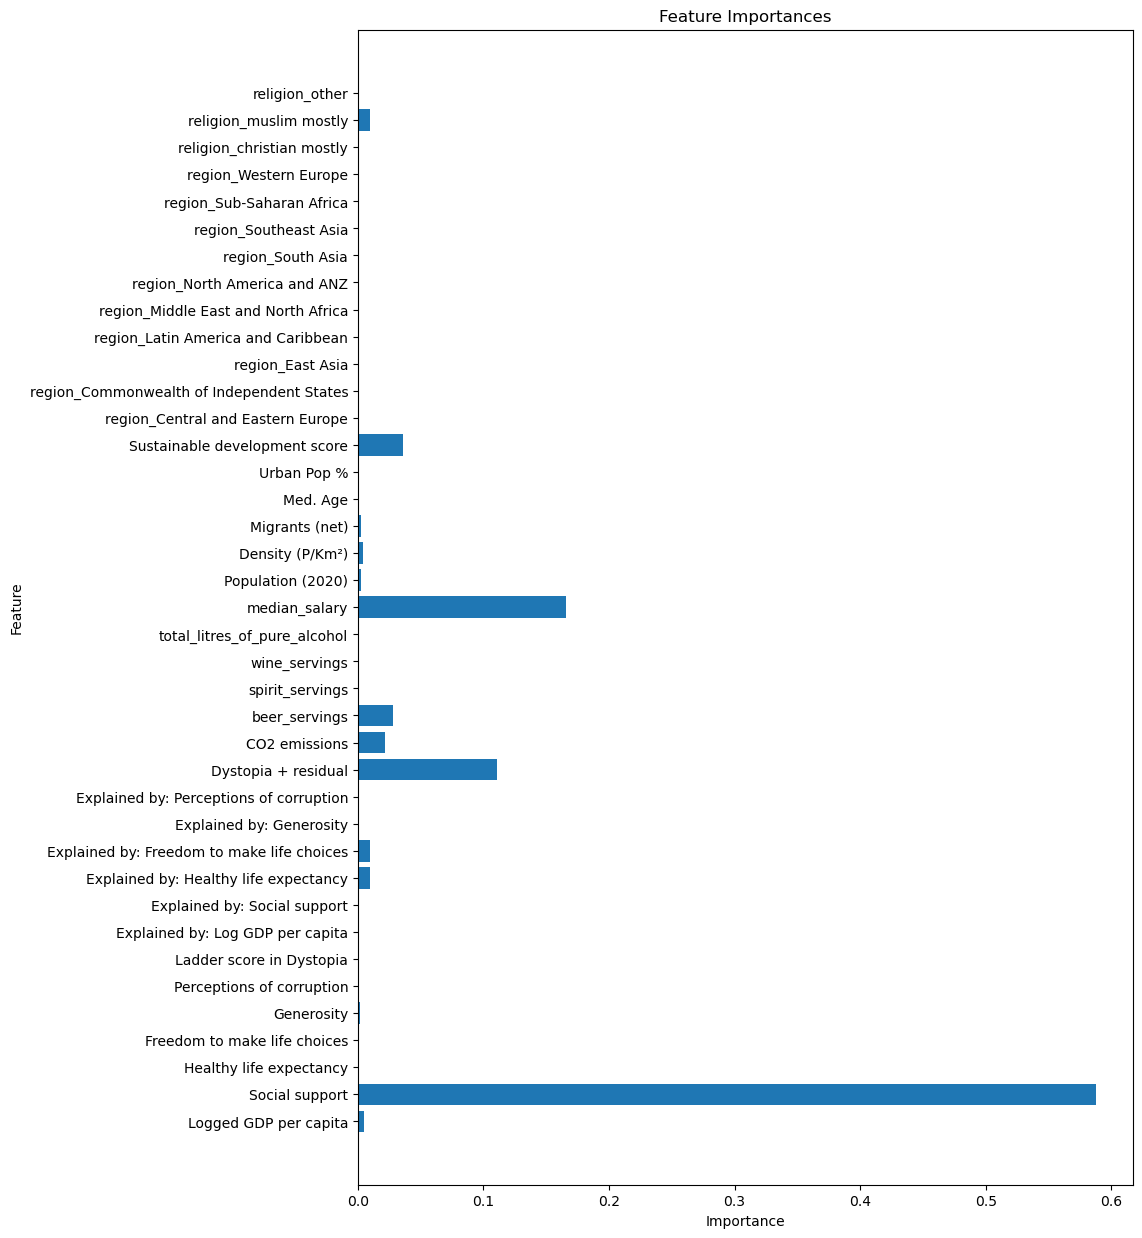

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Separate features (X) and target variable (y)
X = modified_df.drop(columns=['Country Name', 'Happiness Score'])  # Exclude 'Country Name'
y = modified_df['Happiness Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical variables into dummy/indicator variables
X_train_encoded = pd.get_dummies(X_train)

# Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_encoded, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train_encoded.columns, 'Importance': feature_importances})

# Plot feature importances
plt.figure(figsize=(10, 15))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


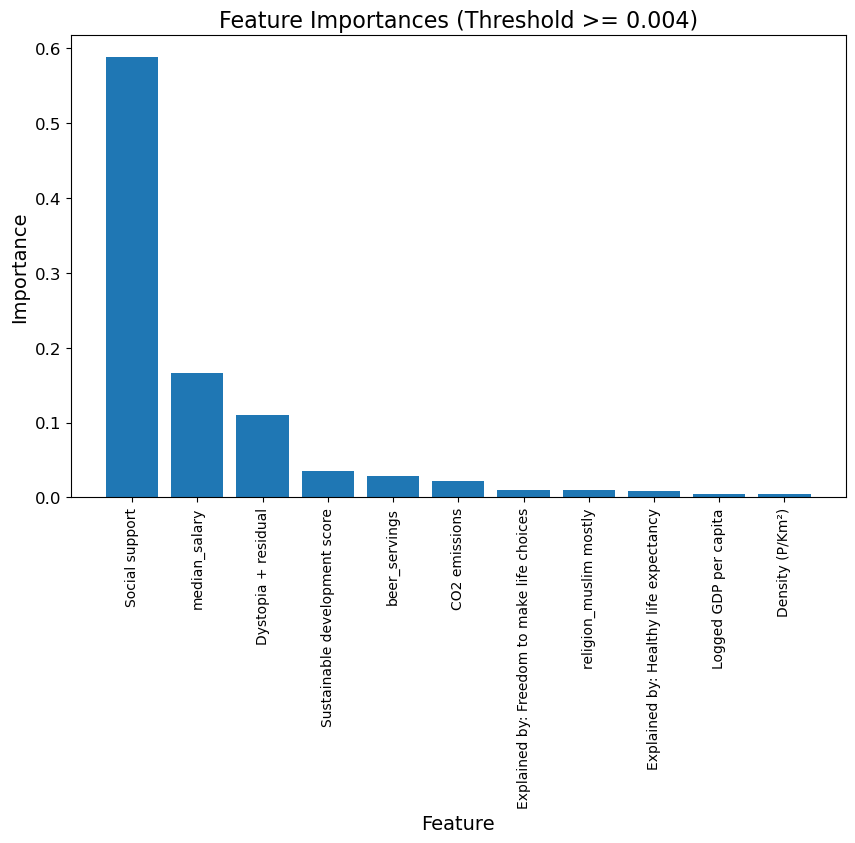

In [60]:
# Set the threshold for feature importance
threshold = 0.004  # Adjust the threshold as needed

# Filter the importance DataFrame based on the threshold
important_features_df = importance_df[importance_df['Importance'] >= threshold]
importance_df_sorted = important_features_df.sort_values(by='Importance', ascending=False)

# Plotting the graph with larger font size
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(importance_df_sorted['Feature'], importance_df_sorted['Importance'])
plt.xlabel('Feature', fontsize=14)  # Adjust fontsize as needed
plt.ylabel('Importance', fontsize=14)  # Adjust fontsize as needed
plt.title('Feature Importances (Threshold >= {:.3f})'.format(threshold), fontsize=16)  # Adjust fontsize as needed
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Adjust fontsize as needed
plt.show()

In [61]:
# Sort the importance_df DataFrame by Importance column in descending order
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 15 features
top_10_features = importance_df_sorted.head(10)

print(top_10_features)

                                       Feature  Importance
1                               Social support    0.587680
19                               median_salary    0.165622
13                         Dystopia + residual    0.110617
25               Sustainable development score    0.035853
15                               beer_servings    0.028043
14                               CO2 emissions    0.021920
10  Explained by: Freedom to make life choices    0.009930
37                      religion_muslim mostly    0.009373
9        Explained by: Healthy life expectancy    0.009289
0                        Logged GDP per capita    0.004648


In [62]:
# Get the names of the top 10 features
important_feature_names = top_10_features['Feature'].tolist()

# Filter the original DataFrame to include only the selected important features
selected_features_df = alldone[['Country Name', 'Happiness Score'] + important_feature_names]

# Display the selected features DataFrame
selected_features_df = pd.DataFrame(selected_features_df)

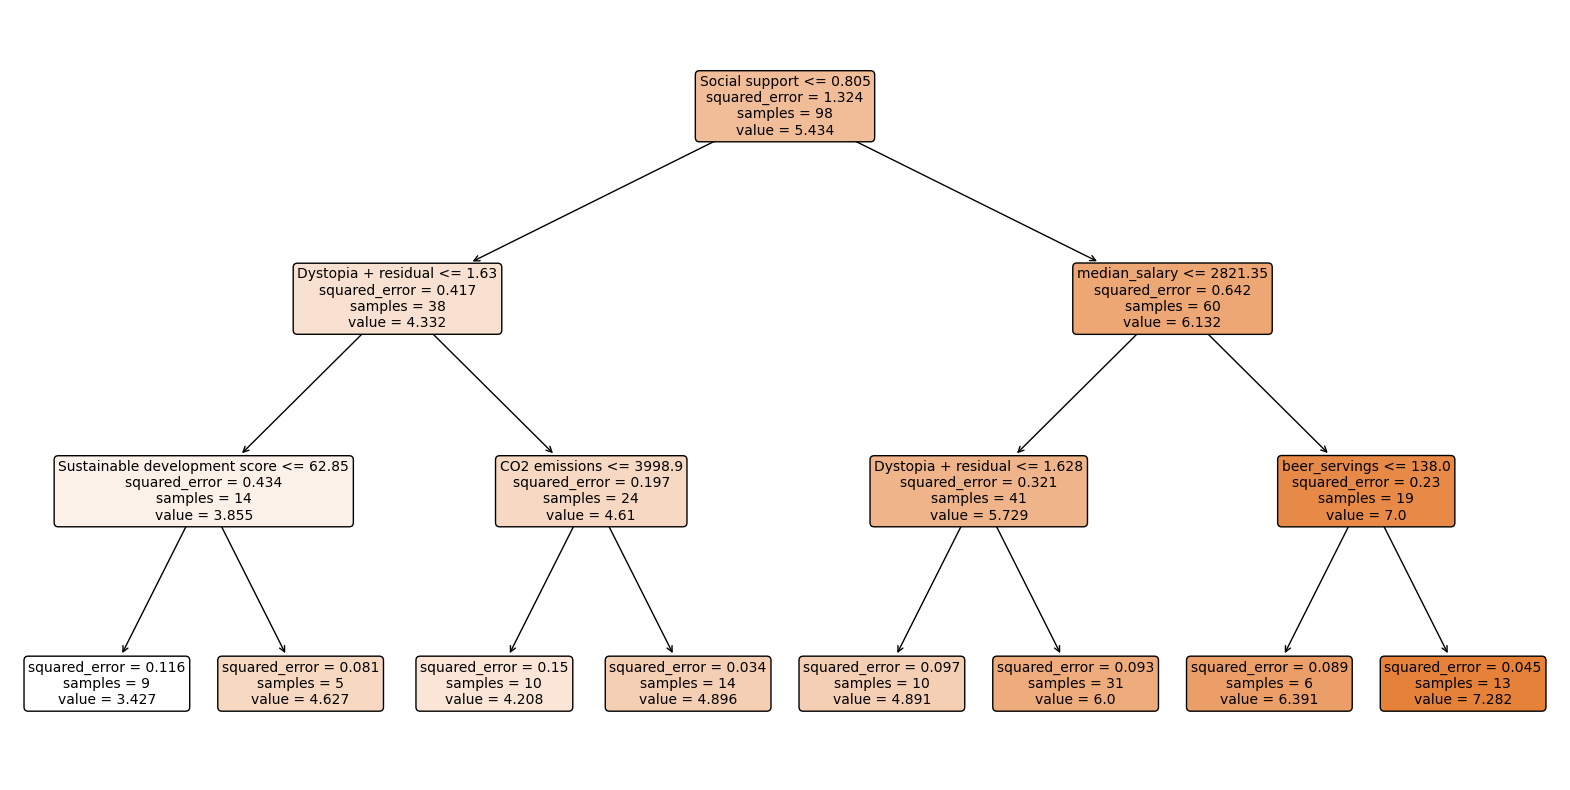

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names_list = X_train_encoded.columns.tolist()

# Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42,max_depth=3)
model.fit(X_train_encoded, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, rounded=True, fontsize=10,feature_names=feature_names_list)
plt.show()


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate regressor performance
print("Mean Squared Error:", mse)

Mean Squared Error: 0.14618619988375273


In [65]:
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

#An R-squared value of 0.866 indicates that the model explains approximately 86.6% of the variance in the target variable (Happiness Score). In general, an R-squared value closer to 1 indicates a better fit of the model to the data, so an R-squared value of 0.866 is considered quite good. However, whether it's "good" or not depends on the context of your specific problem and the standards within your field. It's always a good idea to compare your R-squared value to those of other models or benchmarks to get a better sense of its performance.

R-squared: 0.8662656571465485


In [73]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Assuming X_train and y_train are your training data
# Initialize DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

# Perform cross-validation with 3 folds
cv_scores = cross_val_score(model, X_train, y_train, cv=2, scoring='neg_mean_squared_error')

# Calculate mean squared error (MSE) scores
mse_scores = -cv_scores

# Print MSE scores for each fold
print("MSE Scores:", mse_scores)

# Calculate mean and standard deviation of MSE scores
print("Mean MSE:", np.mean(mse_scores))
print("Standard Deviation of MSE:", np.std(mse_scores))
#When the mean MSE decreases but the standard deviation of MSE increases after cross-validation, it suggests that the average performance of the model has improved, indicating better overall prediction accuracy. However, the increase in the standard deviation of MSE indicates that the variability in the model's performance across different folds of the cross-validation has also increased. This could imply that the model is more sensitive to variations in the training data or that it might be overfitting to certain subsets of the data.In such cases, it's essential to assess whether the increase in variability is acceptable and whether the model's performance is consistent across different data splits. Additionally, you may need to consider adjusting the model parameters or regularization techniques to mitigate overfitting and reduce the variability in performance.

MSE Scores: [0.40468025 0.67155377]
Mean MSE: 0.5381170119317928
Standard Deviation of MSE: 0.13343676041676356


In [85]:
model = DecisionTreeRegressor(random_state=42)

# Perform cross-validation with 3 folds
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calculate mean squared error (MSE) scores
mse_scores = -cv_scores

# Print MSE scores for each fold
print("MSE Scores:", mse_scores)

# Calculate mean and standard deviation of MSE scores
print("Mean MSE:", np.mean(mse_scores))
print("Standard Deviation of MSE:", np.std(mse_scores))
#Experimentation: experiment with different values of k and evaluate their impact on model performance using metrics such as accuracy, mean squared error, or other relevant evaluation metrics.

MSE Scores: [0.27759819 0.129483   0.28668861 0.36232792 0.2970715  0.35075948
 0.14394408 0.23767814 0.41759371 0.82529271]
Mean MSE: 0.3328437342569458
Standard Deviation of MSE: 0.18532026918896094


In [86]:
# Prune the tree using Cost-Complexity Pruning
path = model.cost_complexity_pruning_path(X_train_encoded, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Iterate over different values of ccp_alpha and train/prune decision trees
pruned_trees = []
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_train_encoded, y_train)
    pruned_trees.append(pruned_tree)

# Choose the pruned tree with the best validation performance
best_ccp_alpha = ccp_alphas[np.argmax(impurities)]
pruned_model = DecisionTreeRegressor(random_state=42, ccp_alpha=best_ccp_alpha)
pruned_model.fit(X_train_encoded, y_train)

DecisionTreeRegressor(ccp_alpha=0.7692809161577172, random_state=42)

In [99]:
model = DecisionTreeRegressor(random_state=42, ccp_alpha=0.0071428571428571435)  # Adjust ccp_alpha as needed

# Fit the model to the training data
model.fit(X_train_encoded, y_train)

DecisionTreeRegressor(ccp_alpha=0.0071428571428571435, random_state=42)

In [98]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Define a range of ccp_alpha values to try
ccp_alphas = np.linspace(0, 0.05, 50)  # Adjust the range as needed

# Initialize an empty list to store cross-validation scores
cv_scores = []

# Iterate over the range of ccp_alpha values
for ccp_alpha in ccp_alphas:
    # Initialize DecisionTreeRegressor with current ccp_alpha
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    
    # Perform cross-validation and compute the mean MSE scores
    scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Append the mean MSE score to the list of scores
    cv_scores.append(-scores.mean())

# Find the optimal ccp_alpha value that minimizes MSE
optimal_ccp_alpha = ccp_alphas[np.argmin(cv_scores)]
print("Optimal ccp_alpha:", optimal_ccp_alpha)


Optimal ccp_alpha: 0.0071428571428571435


In [101]:
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.1355818334164348
R-squared (R2): 0.8759667642415524


In [102]:
#Less MSE indicates that your model's predictions are closer to the actual values, suggesting better accuracy. More R-squared indicates that a larger proportion of the variance in the target variable is explained by your model, suggesting better explanatory power.